<a href="https://colab.research.google.com/github/MuhammadQasim069/Deep-Ensemble-Learner-Approach-for-Cyber-Attacks-Detection-in-Smart-Grids/blob/main/Cyber_Attack_Detection_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset from Google Drive**

In [ ]:
# load the dataset
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')

# Get the number of rows in the dataset
num_rows = data.shape[0]
# Print the number of rows
print("Number of rows in the dataset:", num_rows)

Mounted at /content/drive
Number of rows in the dataset: 57412


# **Data Preprocessing**

In [ ]:
import numpy as np
import pandas as pd

# Replace invalid values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove instances with NaN values
data_cleaned = data.dropna()
# Drop columns with NaN values
data_clean = data.dropna(axis=1)

# Remove rows with NaN values
data_clean = data.dropna()
# Print the number of removed instances
num_removed_instances = len(data) - len(data_cleaned)
print("Number of removed instances:", num_removed_instances)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Separate the features and target variable
X = data_cleaned.drop("marker", axis=1)
y = data_cleaned["marker"]

# create an imputer to replace NaN values with mean
imputer = SimpleImputer(strategy='mean')

# fit the imputer on the data
imputer.fit(X)

# replace NaN values with mean
X = imputer.transform(X)

# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

Number of removed instances: 4603


# **SMOTE Oversampling**

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate the features (X) and the target variable (y)
X = data_cleaned.drop('marker', axis=1)
y = data_cleaned['marker']

# Apply SMOTE for oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution before and after oversampling
print("Before oversampling:", len(y))
print("NoEvents:", len(y[y == "NoEvents"]))
print("Natural:", len(y[y == "Natural"]))
print("Attack:", len(y[y == "Attack"]))

print("After oversampling:", len(y_resampled))
print("NoEvents:", len(y_resampled[y_resampled == "NoEvents"]))
print("Natural:", len(y_resampled[y_resampled == "Natural"]))
print("Attack:", len(y_resampled[y_resampled == "Attack"]))


Before oversampling: 52809
NoEvents: 3135
Natural: 11812
Attack: 37862
After oversampling: 113586
NoEvents: 37862
Natural: 37862
Attack: 37862


# **Data Visualization**

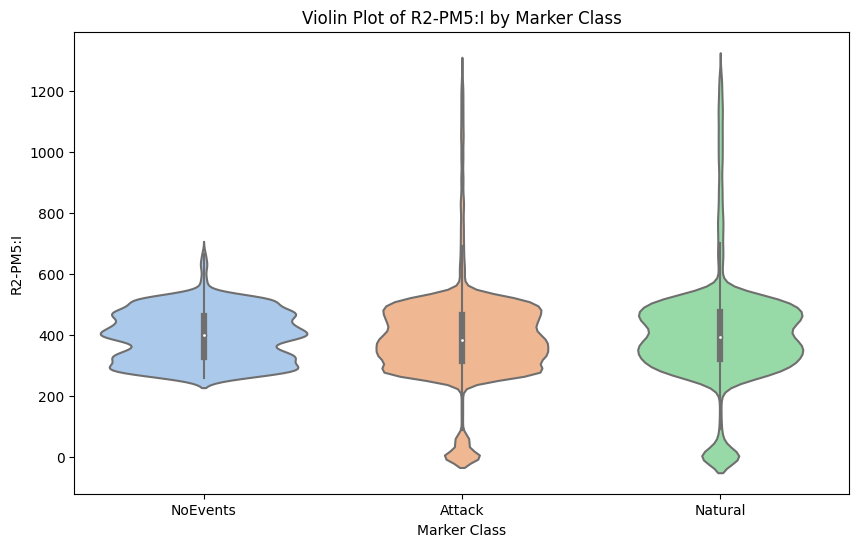

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif

# Assuming X contains your feature columns and y contains the target column ("marker")
X = data.drop(columns=['marker'])  # Features
y = data['marker']  # Target

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_imputed = imputer.fit_transform(X)

# Compute mutual information between features and target
information_gains = mutual_info_classif(X_imputed, y)

# Get the index of the column with the highest information gain
most_informative_column_index = information_gains.argmax()

# Get the name of the most informative column
most_informative_column = X.columns[most_informative_column_index]

# Creating a violin plot for the most informative column
plt.figure(figsize=(10, 6))
sns.violinplot(x='marker', y=most_informative_column, data=data, palette='pastel')
plt.title(f'Violin Plot of {most_informative_column} by Marker Class')
plt.xlabel('Marker Class')
plt.ylabel(most_informative_column)
plt.show()


In [ ]:
# Print the name of the most informative column
print(f"The most informative variable is: {most_informative_column}")

The most informative variable is: R2-PM5:I


# **Saving Resampled Data in separate .csv file**

In [ ]:
# Convert the resampled data into a DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['marker'] = y_resampled

# Define the file path where you want to save the CSV file in Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/resampled_data.csv'

# Save the resampled data to a CSV file in Google Drive
resampled_data.to_csv(file_path, index=False)

print("Resampled data has been saved to:", file_path)

<ipython-input-6-916156216b9d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_data['marker'] = y_resampled


Resampled data has been saved to: /content/drive/MyDrive/Colab Notebooks/resampled_data.csv


# **Feature Extraction**

Mounted at /content/drive
Epoch 1/50
2840/2840 [==============================] - 16s 4ms/step - loss: 0.2366 - val_loss: 0.0100
Epoch 2/50
2840/2840 [==============================] - 9s 3ms/step - loss: 0.1107 - val_loss: 0.0049
Epoch 3/50
2840/2840 [==============================] - 10s 4ms/step - loss: 0.0821 - val_loss: 0.0044
Epoch 4/50
2840/2840 [==============================] - 10s 4ms/step - loss: 0.0616 - val_loss: 0.0116
Epoch 5/50
2840/2840 [==============================] - 12s 4ms/step - loss: 0.0568 - val_loss: 0.0074
Epoch 6/50
2840/2840 [==============================] - 9s 3ms/step - loss: 0.0470 - val_loss: 0.0033
Epoch 7/50
2840/2840 [==============================] - 10s 4ms/step - loss: 0.0453 - val_loss: 0.0029
Epoch 8/50
2840/2840 [==============================] - 10s 4ms/step - loss: 0.0413 - val_loss: 0.0028
Epoch 9/50
2840/2840 [==============================] - 10s 4ms/step - loss: 0.0372 - val_loss: 0.0044
Epoch 10/50
2840/2840 [==========================

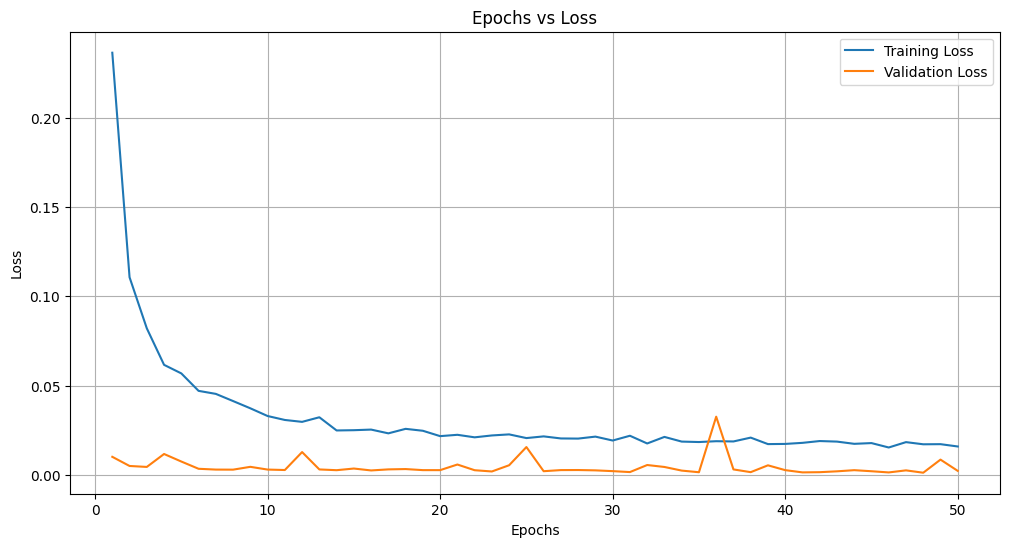

3550/3550 [==============================] - 6s 2ms/step


In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Load resampled data from CSV file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resampled_data.csv')

# Separate features and target variable
X = data.drop(columns=['marker'])  # Features
y = data['marker']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the architecture of the autoencoder
input_layer = Input(shape=(X_scaled.shape[1],))
encoded = Dense(90, activation='relu')(input_layer)  # Encoder layer with 128 units
decoded = Dense(X_scaled.shape[1], activation='linear')(encoded)  # Decoder layer with linear activation

autoencoder = Model(input_layer, decoded)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history = autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Extract loss values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot epochs vs loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.grid(True)
plt.show()

# Extract features using the encoder part of the trained autoencoder
encoder = Model(input_layer, encoded)
encoded_features = encoder.predict(X_scaled)


 Accuracy Score on Testing Set : 0.95
Precision Score on Testing Set :  0.9462969076702983


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Recall Score on Testing Set :  0.9462969076702983
F1-score on Testing Set :  0.9462969076702983
 Confusion Matrix on Validation Set:
 [[5629  339   33]
 [ 520 5479   43]
 [  19   22 6090]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


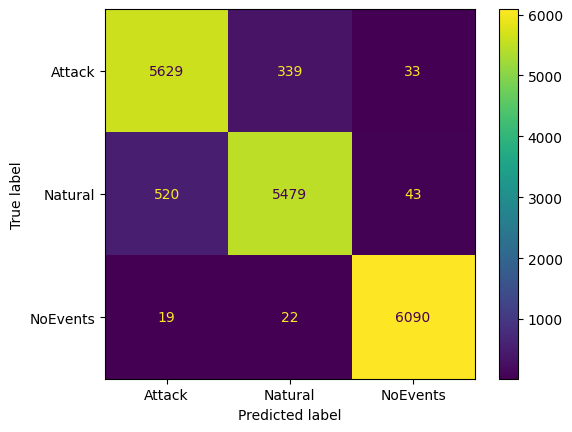

 Accuracy Score on Testing Set : 0.95
Precision Score on Testing Set :  0.9491152390175192


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Recall Score on Testing Set :  0.9491152390175192
F1-score on Testing Set :  0.9491152390175192


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


 Classification Report on Testing Set:
               precision    recall  f1-score   support

      Attack       0.92      0.94      0.93      7596
     Natural       0.94      0.91      0.93      7616
    NoEvents       0.99      0.99      0.99      7506

    accuracy                           0.95     22718
   macro avg       0.95      0.95      0.95     22718
weighted avg       0.95      0.95      0.95     22718



In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
# Convert encoded_features to a DataFrame with appropriate column names
encoded_features_df = pd.DataFrame(encoded_features, columns=[f'feature_{i}' for i in range(encoded_features.shape[1])])

# Concatenate encoded features with the 'marker' column
df_selected = pd.concat([encoded_features_df, data['marker']], axis=1)
df_selected = df_selected.iloc[:, :-1]

# Split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(df_selected, y, test_size=0.2, random_state=42)

# Split the training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Create a base ExtraTreeClassifier model
base_model = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=5, random_state=42)

# Create a neural network model as the meta-classifier
meta_model = MLPClassifier(hidden_layer_sizes=(100,90,80), activation='relu', solver='adam', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.01, max_iter=1000, shuffle=True, random_state=42, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Create a stacking classifier that combines the pipeline and neural network meta-classifier
stacked_model = StackingClassifier(estimators=[('base_model', base_model)], final_estimator=meta_model)

# Fit the stacking classifier to the training data and collect history
stacked_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = stacked_model.predict(X_val)

# Evaluate the model performance on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("\033[031m\033[1m", "Accuracy Score on Testing Set : {:.2f}".format(accuracy_val))

# Calculate and print the precision score on the testing set
precision_test = precision_score(y_val, y_val_pred, pos_label='positive', average='micro')
print("Precision Score on Testing Set : ", precision_test)

# Calculate and print the recall score on the testing set
recall_test = recall_score(y_val, y_val_pred, pos_label='positive', average='micro')
print("Recall Score on Testing Set : ", recall_test)

# Calculate and print the F1-score on the testing set
f1_test = f1_score(y_val, y_val_pred, pos_label='positive', average='micro')
print("F1-score on Testing Set : ", f1_test)
print("\033[034m\033[1m", "Confusion Matrix on Validation Set:\n", confusion_matrix(y_val, y_val_pred))
cm_val = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=stacked_model.classes_).plot()
plt.show()

# Make predictions on the testing set
y_test_pred = stacked_model.predict(X_test)

# Calculate and print the accuracy score on the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\033[031m\033[1m", "Accuracy Score on Testing Set : {:.2f}".format(accuracy_test))

# Calculate and print the precision score on the testing set
precision_test = precision_score(y_test, y_test_pred, pos_label='positive', average='micro')
print("Precision Score on Testing Set : ", precision_test)

# Calculate and print the recall score on the testing set
recall_test = recall_score(y_test, y_test_pred, pos_label='positive', average='micro')
print("Recall Score on Testing Set : ", recall_test)

# Calculate and print the F1-score on the testing set
f1_test = f1_score(y_test, y_test_pred, pos_label='positive', average='micro')
print("F1-score on Testing Set : ", f1_test)

# Generate and print the classification report for the testing set
class_report = classification_report(y_test, y_test_pred)
print("\033[034m\033[1m", "Classification Report on Testing Set:\n", class_report)

# **ROC of the Proposed Model**

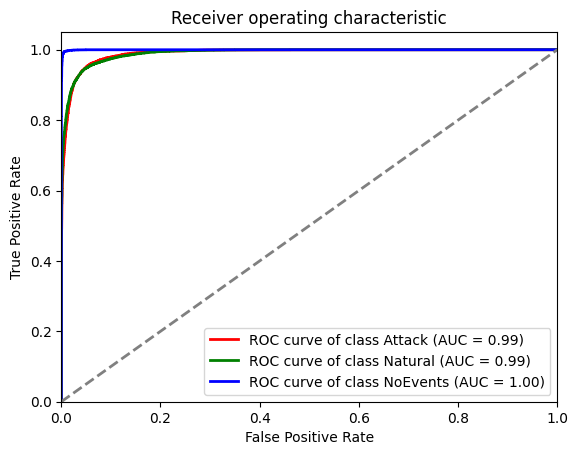

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Get the predicted probabilities for each class
y_test_proba = stacked_model.predict_proba(X_test)

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(stacked_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == stacked_model.classes_[i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
lw = 2
colors = ['red', 'green', 'blue']
for i, color in zip(range(len(stacked_model.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(stacked_model.classes_[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
